![logo](https://drive.google.com/uc?export=view&id=1QJ9PAT9q-Ksv_Vs_pLXtLHxjjV-9FMTz)

<h1><b> Iris Data Classification (Using TensorFlow)<b></h1>

_Prepared by_ [**Noureldin Mohamed**](mailto:s-noureldin.hamedo@zewailcity.edu.eg)



# Introduction

The [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris/) stands as a renowned benchmark for classification tasks in machine learning. Comprising 150 samples of iris plants, each entry encompasses four features (sepal length, sepal width, petal length, and petal width) along with a target label indicating the species of the iris plant (setosa, versicolor, or virginica).

Addressing the assignment centered around the Iris dataset involves a systematic approach. The process commences with data preprocessing, encompassing tasks such as feature scaling and the partitioning of data into training and validation sets. Subsequently, the development and training of a Deep Learning model unfold, requiring decisions on architecture, optimization algorithms, learning rates, and epoch counts. The final step entails a comprehensive evaluation of the model's performance, employing metrics like accuracy, precision, and recall to gauge its proficiency in accurately classifying the diverse iris plants.

![Iris Classification](https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png)


# **Imports**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.utils import plot_model



# **Loading The Data**

In [ ]:
!gdown 1OkI-S3Kn9-WWYzMecG2JJXIpxeeSLFbf # Download the data from the drive

Downloading...
From: https://drive.google.com/uc?id=1OkI-S3Kn9-WWYzMecG2JJXIpxeeSLFbf
To: /content/iris.csv
100% 4.75k/4.75k [00:00<00:00, 17.2MB/s]


Lets load the data into a dataframe.

In [ ]:
iris=pd.read_csv('iris.csv') # Place the data in a dataframe

Lets Display the data frame, and check some info about the dataset.

In [ ]:
iris

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sepal_l  150 non-null    float64
 1   sepal_w  150 non-null    float64
 2   petal_l  150 non-null    float64
 3   petal_w  150 non-null    float64
 4   species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# **Exploratory Data Analysis**


Exploratory Data Analysis (EDA) is a process of analyzing and summarizing a data set in order to understand the underlying structure and relationships within the data. EDA is an important step in the data science process, as it allows you to identify patterns, trends, and anomalies in the data that may not be immediately apparent.

There are several benefits of performing EDA for Deep Learning:

- EDA helps you understand the data: By performing EDA, you can get a better understanding of the data you are working with, including the distribution of the data, the relationships between different features, and any missing or corrupted values.
- EDA can identify potential problems: EDA can help you identify potential problems with the data, such as missing values or outliers, which could impact the performance of your Deep Learning model.
- EDA can inform model selection: EDA can help you understand the characteristics of the data, which can inform your choice of Deep Learning model. For example, if the data is highly non-linear, you may want to consider using a model that is capable of capturing complex relationships, such as a neural network.
- EDA can improve model performance: By understanding the underlying structure of the data, you can better tune the hyperparameters of your Deep Learning model, which can lead to improved performance.

Overall, EDA is an important step in the Deep Learning process, as it helps you understand the data and identify potential issues that could impact the performance of your model. EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data.

## **Checking for nulls**
Checking for nulls (or missing values) in a dataset is a crucial step in the data preprocessing phase. Detecting and handling null values is essential to avoid any misinterpretation.

In [ ]:
iris.isna().sum()

sepal_l    0
sepal_w    0
petal_l    0
petal_w    0
species    0
dtype: int64

## **Checking for duplicates**
Duplicate entries can introduce inaccuracies in analyses and statistical summaries, leading to distorted insights. Ensuring data accuracy is paramount, and detecting and eliminating duplicates is a key step in achieving this. This can result in overfitting, where the model performs well on the training data but poorly on new, unseen data (biased model), so to avoid this we drop duplicates

In [ ]:
iris.duplicated().sum()

1

There is a duplicate that needs to be dropped

In [ ]:
iris=iris.drop_duplicates()

Lets check which species had the duplicate.

In [ ]:
iris.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     49
dtype: int64

## **Exploring Relations between features**

### **Sepal Length VS Sepal Width**

---



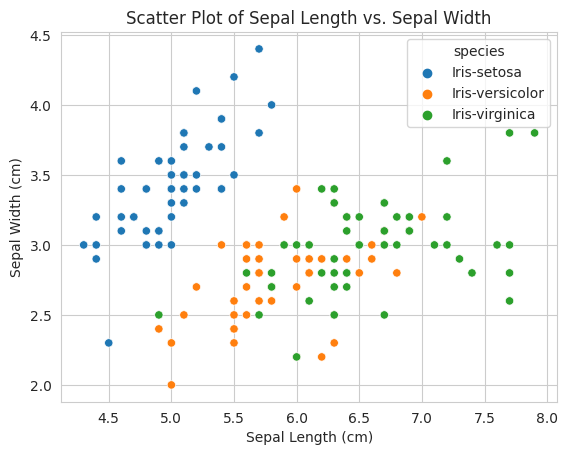

In [ ]:
sns.scatterplot(x='sepal_l', y='sepal_w', hue='species', data=iris)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.show()

We notice that from the Sepal Width, and the Sepal Length we can easily distinguish a setosa from the rest.
Let me Visualize it below

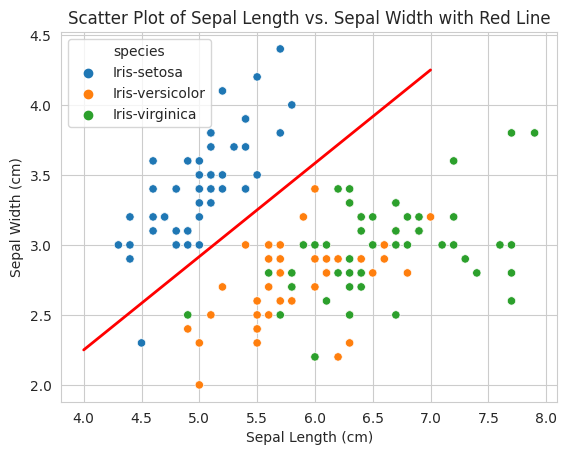

In [ ]:
sns.scatterplot(x='sepal_l', y='sepal_w', hue='species', data=iris)

# Draw a red line from (4, 2.5) to (7, 4.25)
plt.plot([4, 7], [2.25, 4.25], color='red', linestyle='-', linewidth=2)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs. Sepal Width with Red Line')
plt.show()

### **Sepal Length VS Petal Length**

---



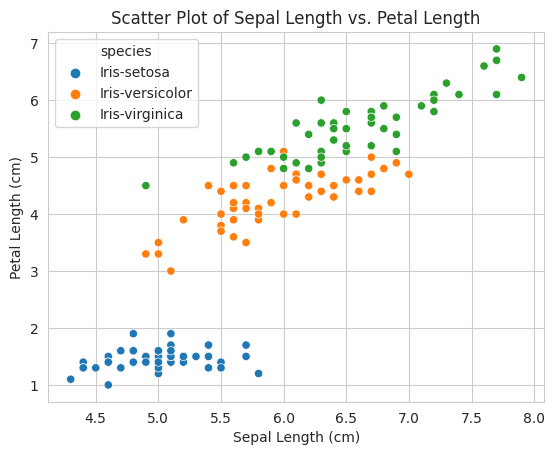

In [ ]:
sns.scatterplot(x='sepal_l', y='petal_l', hue='species', data=iris)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Scatter Plot of Sepal Length vs. Petal Length')
plt.show()

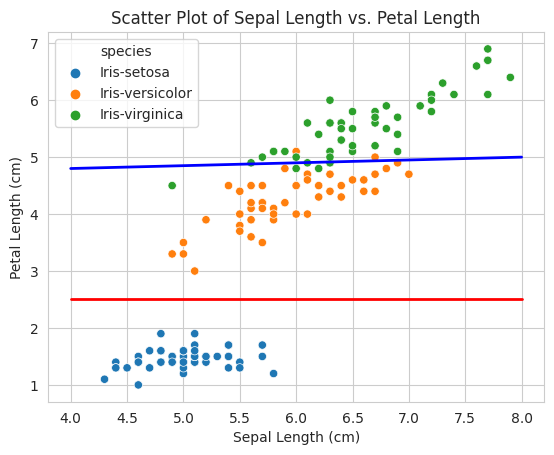

In [ ]:
sns.scatterplot(x='sepal_l', y='petal_l', hue='species', data=iris)
plt.plot([4, 8], [2.5, 2.5], color='red', linestyle='-', linewidth=2)
plt.plot([4, 8], [4.8, 5], color='blue', linestyle='-', linewidth=2)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Scatter Plot of Sepal Length vs. Petal Length')
plt.show()

### **Sepal Length VS Petal Width**

---



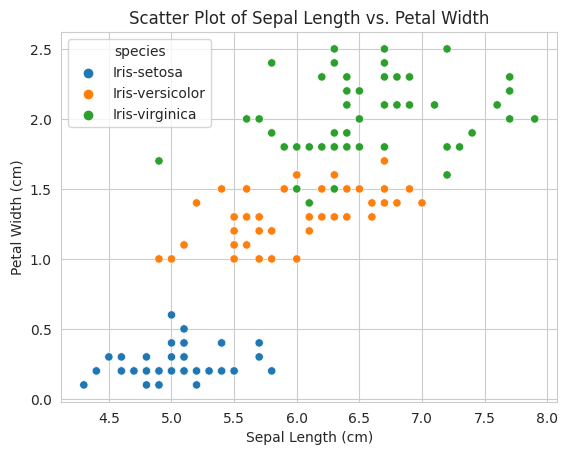

In [ ]:
sns.scatterplot(x='sepal_l', y='petal_w', hue='species', data=iris)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs. Petal Width')
plt.show()

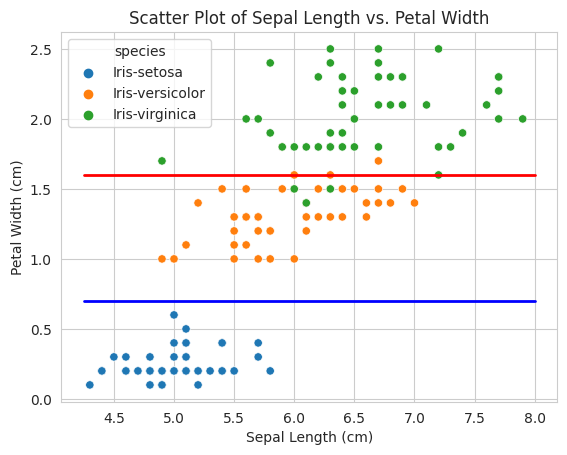

In [ ]:
sns.scatterplot(x='sepal_l', y='petal_w', hue='species', data=iris)
plt.plot([4.25,8],[0.7,0.7], color='blue', linestyle='-', linewidth=2)
plt.plot([4.25,8],[1.6,1.6], color='red', linestyle='-', linewidth=2)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs. Petal Width')
plt.show()

### **Petal Length VS Petal Width**

---



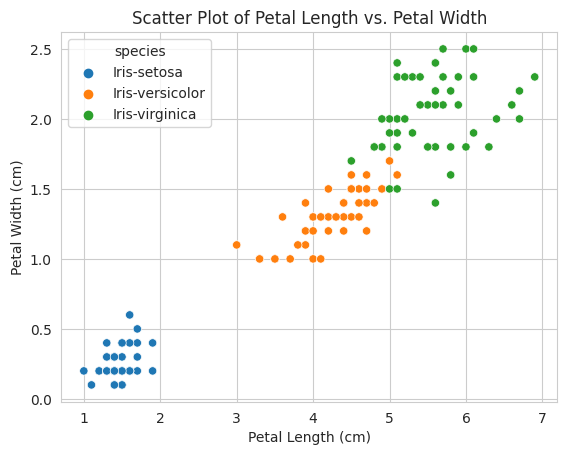

In [ ]:
sns.scatterplot(x='petal_l', y='petal_w', hue='species', data=iris)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Petal Length vs. Petal Width')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


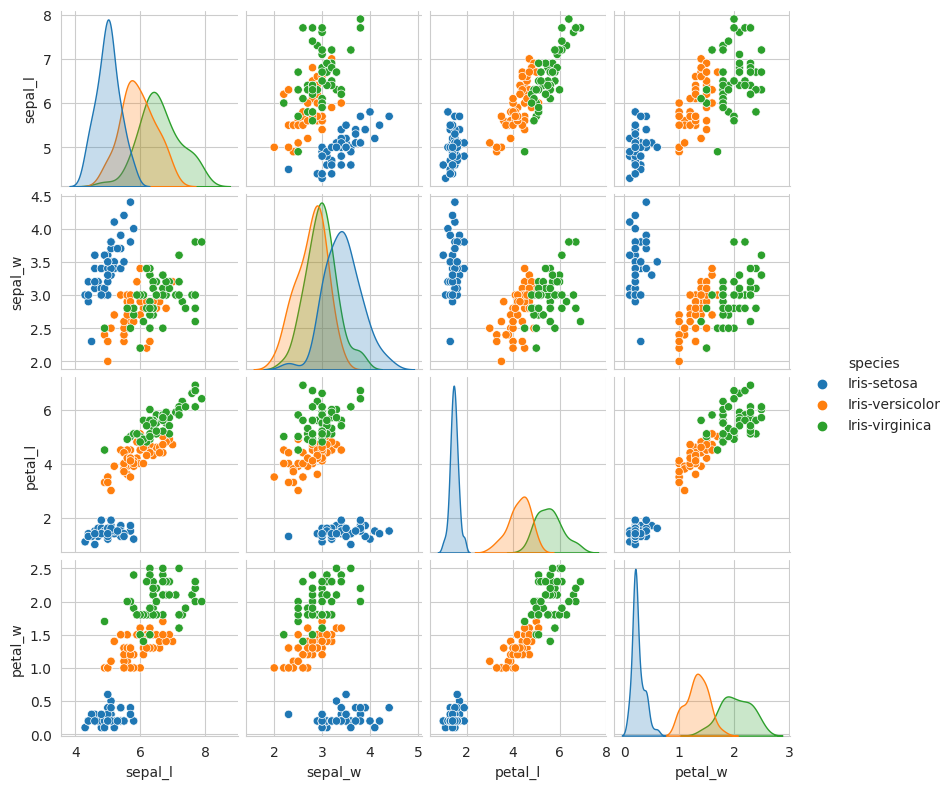

In [ ]:
sns.pairplot(iris, hue = 'species', size = 2, diag_kind = 'kde')
plt.show()

Looking at the pairplot generated, we can notice that virginica and versicolor nearly have equal sepal width.

### **Correlation between features**

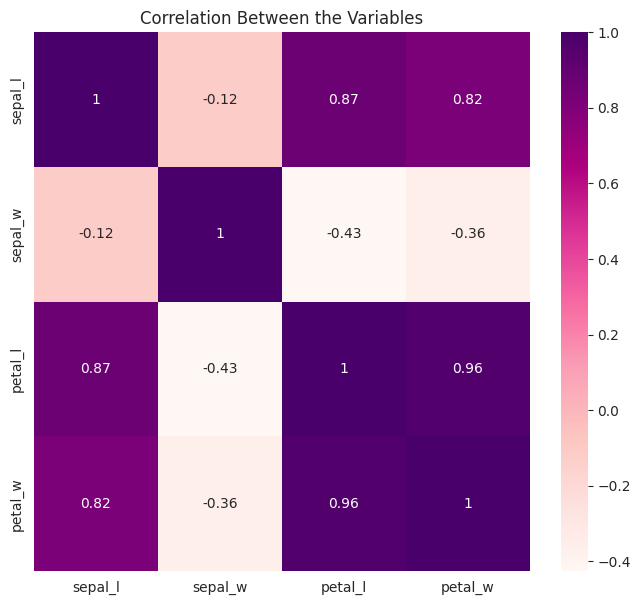

In [ ]:
numeric_data = iris.select_dtypes(include='number')# select only the columns in the DataFrame data that have numeric (number) data
correlation_matrix = numeric_data.corr()
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(correlation_matrix, annot=True,ax=ax,  cmap="RdPu")
plt.title('Correlation Between the Variables')
#plt.xticks(rotation=45);
plt.show()

## **Preparing the Data**

In [ ]:
y = iris['species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 149, dtype: object

Lets Encode the y

One Hot Encoding is preferred here, since the species has no ordinality.

In [ ]:
y = pd.get_dummies(y, prefix='species')

In [ ]:
X = iris[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Split the data into training and testing sets

In [ ]:
X_train

,sepal_l,sepal_w,petal_l,petal_w
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [ ]:
y_train

,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
22,1,0,0
15,1,0,0
65,0,1,0
11,1,0,0
42,1,0,0
...,...,...,...
71,0,1,0
106,0,0,1
14,1,0,0
92,0,1,0


## **Building the Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Flatten, Dense

model = Sequential()

model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1), padding='same'))
model.add(BatchNormalization())

model.add(Conv1D(32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))


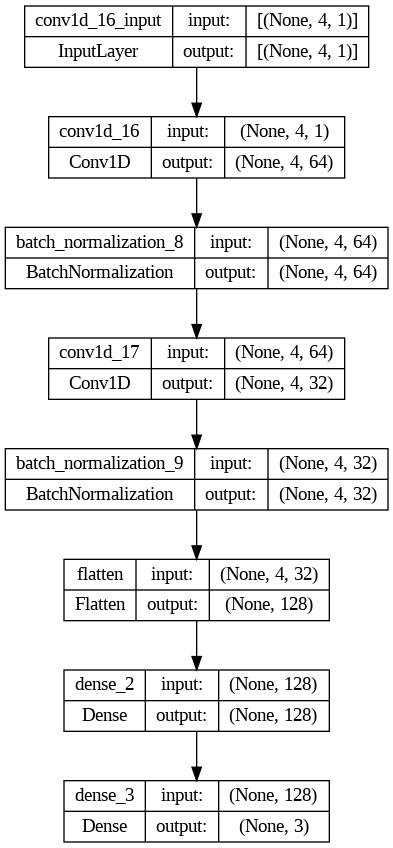

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Epoch 1/10
12/12 [==============================] - 3s 25ms/step - loss: 0.1028 - accuracy: 0.9664 - val_loss: 0.0946 - val_accuracy: 0.9667
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: 0.0634 - accuracy: 0.9664 - val_loss: 0.1067 - val_accuracy: 0.9000
Epoch 3/10
12/12 [==============================] - 0s 6ms/step - loss: 0.0745 - accuracy: 0.9832 - val_loss: 0.0377 - val_accuracy: 0.9667
Epoch 4/10
12/12 [==============================] - 0s 7ms/step - loss: 0.0498 - accuracy: 0.9832 - val_loss: 0.0557 - val_accuracy: 0.9667
Epoch 5/10
12/12 [==============================] - 0s 7ms/step - loss: 0.0419 - accuracy: 0.9748 - val_loss: 0.0258 - val_accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 0s 7ms/step - loss: 0.0742 - accuracy: 0.9664 - val_loss: 0.0250 - val_accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 0s 7ms/step - loss: 0.1080 - accuracy: 0.9664 - val_loss: 0.0578 - val_accuracy: 0.9667
Epoch 8/10
12/12 [=

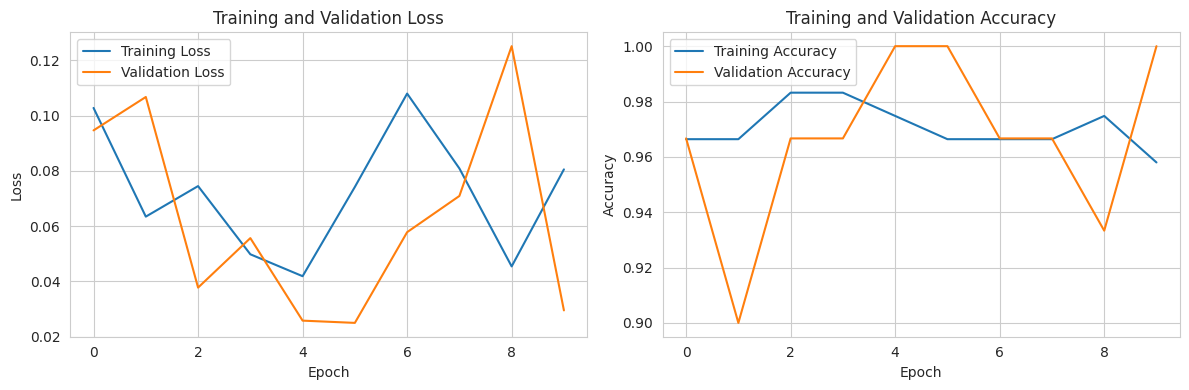

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history =model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 205ms/step - loss: 0.0295 - accuracy: 1.0000


In [ ]:
print(f'The test Accuracy is: {test_accuracy*100}%')

The test Accuracy is: 100.0%


## **Visualizing the Training and Testing**

Lets obtain the predictions

In [ ]:
y_train_pred_prob = model.predict(X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1))
y_test_pred_prob = model.predict(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1))

1/1 [==============================] - 0s 21ms/step


We now have the probabilities for every class, our prediction is the class with the highest probability, so we need to use argmax on the colomns.

In [ ]:
y_train_pred = y_train_pred_prob.argmax(axis=1)
y_test_pred = y_test_pred_prob.argmax(axis=1)

Lets convert the Dataframe into a numpy array.

In [ ]:
y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()

Lets get the confusion matrix, we need to make argmax on the original y_train and y_test to know the original class.

In [ ]:
conf_matrix_train = confusion_matrix(y_train_array.argmax(axis=1), y_train_pred)
conf_matrix_test = confusion_matrix(y_test_array.argmax(axis=1), y_test_pred)

Now we define the classes for mapping to be able to display the name rather than the label

In [ ]:
class_labels = ['setosa', 'versicolor', 'virginica']

We get the Classification Report as well.

In [ ]:
class_report_train = classification_report(y_train_array.argmax(axis=1), y_train_pred, target_names=class_labels)
class_report_test = classification_report(y_test_array.argmax(axis=1), y_test_pred, target_names=class_labels)

print("Training Classification Report:")
print(class_report_train)

print("\nTesting Classification Report:")
print(class_report_test)

Training Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       1.00      0.98      0.99        41
   virginica       0.97      1.00      0.99        38

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119


Testing Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Now lets plot the confusion matrix.

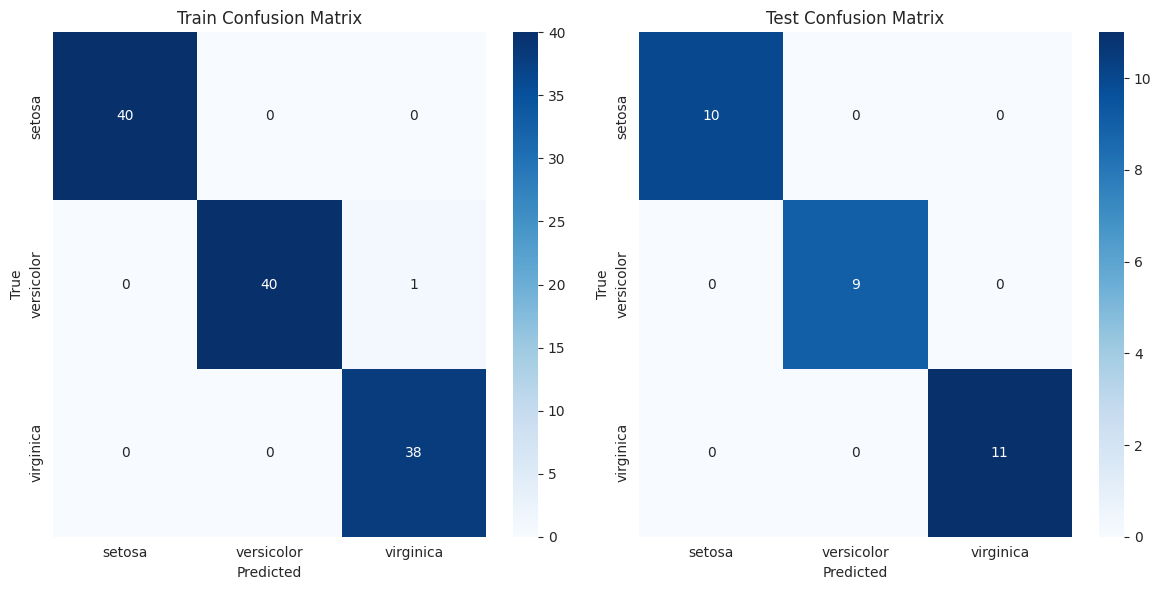

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

We can notice that during the training the confusion that happened was between the Versicolor and Virginica as we anticipated during our EDA.